### UNIT 2 - EDA - Missing values/ Change numerical values with cathegorical

In [4]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [102]:
autompg = pd.read_csv("Desktop/ML/auto-mpg.csv")


In [46]:
autompg.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [48]:
autompg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [50]:
autompg.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [52]:
autompg.shape

(398, 9)

In [54]:
numeric_features = autompg.select_dtypes(include=[np.number])

numeric_features.columns

Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

In [56]:
categorical_features = autompg.select_dtypes(include=[object])
print(categorical_features.columns)

Index(['horsepower', 'car name'], dtype='object')


In [58]:
autompg.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [60]:
autompg.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [62]:
(autompg['horsepower'] == '?').sum()

6

In [64]:
autompg = autompg[autompg.horsepower != '?']
(autompg.horsepower == '?').sum()

0

### Skewness and Curtosis

In [67]:
numeric_columns = autompg.select_dtypes(include=[float, int])

numeric_columns.skew(), numeric_columns.kurt()

(mpg             0.457092
 cylinders       0.508109
 displacement    0.701669
 weight          0.519586
 acceleration    0.291587
 model year      0.019688
 origin          0.915185
 dtype: float64,
 mpg            -0.515993
 cylinders      -1.398199
 displacement   -0.778317
 weight         -0.809259
 acceleration    0.444234
 model year     -1.167446
 origin         -0.841885
 dtype: float64)

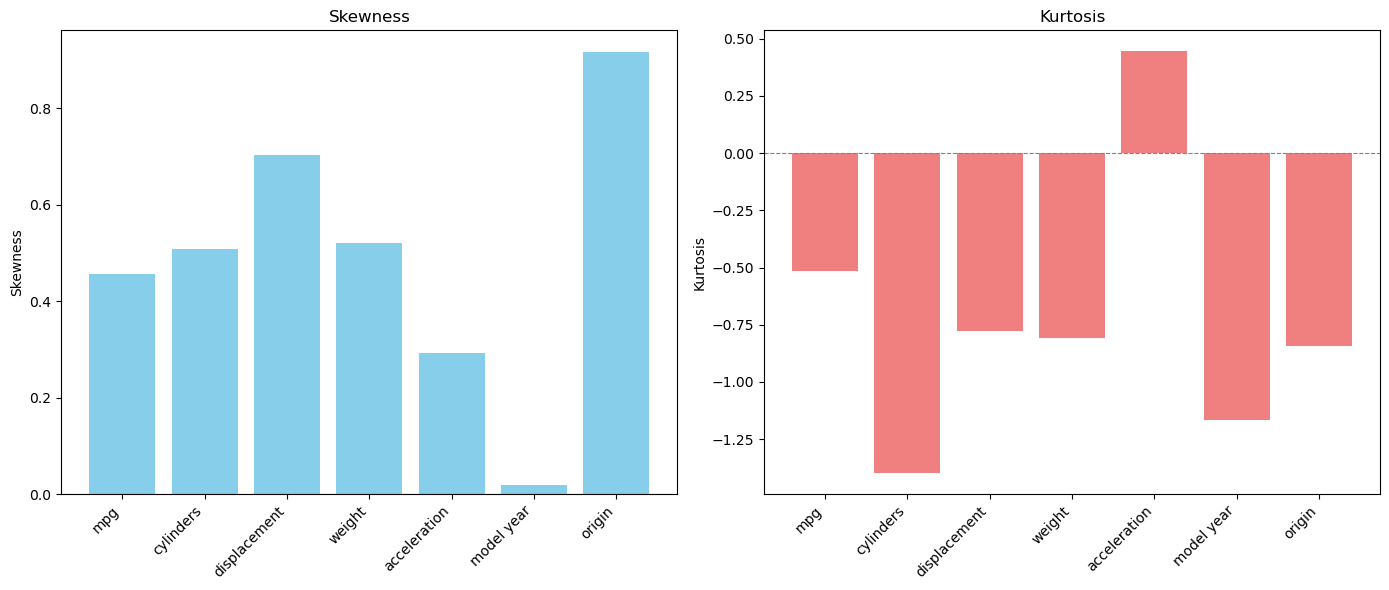

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

skewness = pd.Series({
    "mpg": 0.457092,
    "cylinders": 0.508109,
    "displacement": 0.701669,
    "weight": 0.519586,
    "acceleration": 0.291587,
    "model year": 0.019688,
    "origin": 0.915185
})

kurtosis = pd.Series({
    "mpg": -0.515993,
    "cylinders": -1.398199,
    "displacement": -0.778317,
    "weight": -0.809259,
    "acceleration": 0.444234,
    "model year": -1.167446,
    "origin": -0.841885
})

fig, ax = plt.subplots(1, 2, figsize=(14, 6))


ax[0].bar(skewness.index, skewness.values, color='skyblue')
ax[0].axhline(0, color='gray', linewidth=0.8, linestyle='--')
ax[0].set_title('Skewness')
ax[0].set_ylabel('Skewness')
ax[0].set_xticks(range(len(skewness.index)))
ax[0].set_xticklabels(skewness.index, rotation=45, ha='right')


ax[1].bar(kurtosis.index, kurtosis.values, color='lightcoral')
ax[1].axhline(0, color='gray', linewidth=0.8, linestyle='--')
ax[1].set_title('Kurtosis')
ax[1].set_ylabel('Kurtosis')
ax[1].set_xticks(range(len(kurtosis.index)))
ax[1].set_xticklabels(kurtosis.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()



In [70]:
autompg.loc[autompg.origin == 1, 'origin'] = 'USA'
autompg.loc[autompg.origin == 2, 'origin'] = 'Europe'
autompg.loc[autompg.origin == 3, 'origin'] = 'Asia'

autompg['origin'] = autompg['origin'].astype('category')

autompg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    object  
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   model year    392 non-null    int64   
 7   origin        392 non-null    category
 8   car name      392 non-null    object  
dtypes: category(1), float64(3), int64(3), object(2)
memory usage: 28.1+ KB


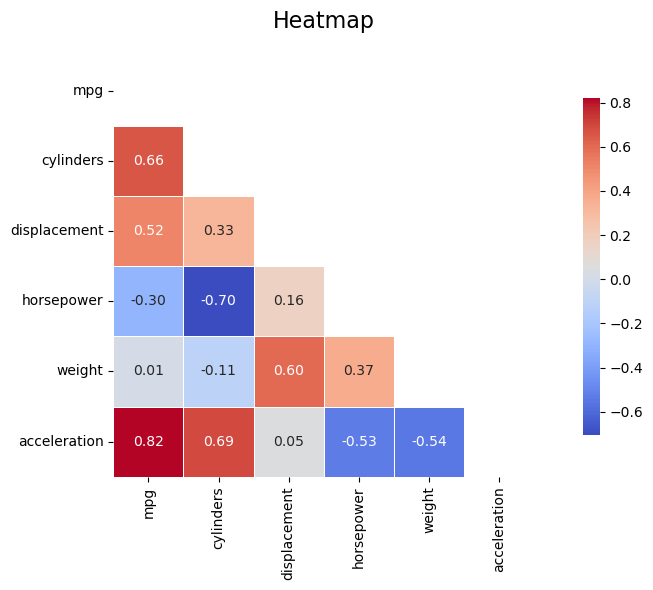

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)
autompg = pd.DataFrame(
    np.random.rand(6, 6), 
    columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
)

corr = autompg.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    square=True
)

plt.title("Heatmap", fontsize=16, pad=20)
plt.tight_layout()
plt.show()


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')
[1 3 2]


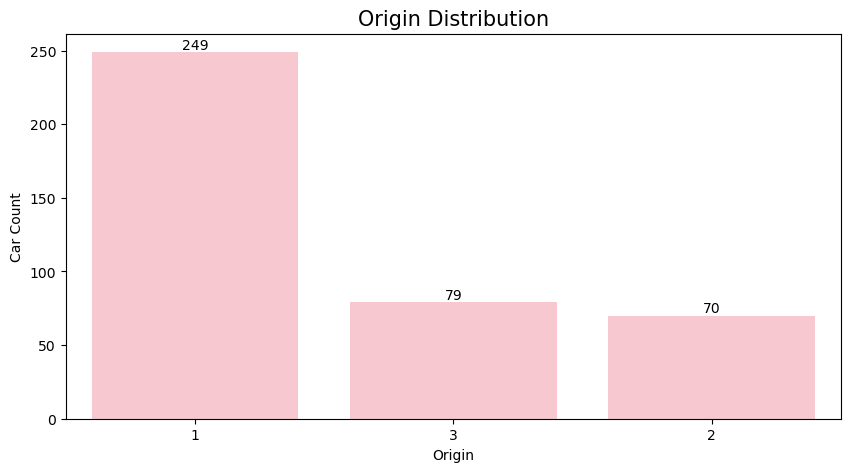

In [104]:
autompg.rename(columns={'Region': 'origin'}, inplace=True)

print(autompg.columns)

print(autompg['origin'].unique())
autompg['origin'] = autompg['origin'].astype(str)
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='origin', data=autompg, color='pink')  
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("Origin Distribution", fontsize=15)
plt.xlabel("Origin", fontsize=10)
plt.ylabel("Car Count", fontsize=10)
plt.show()

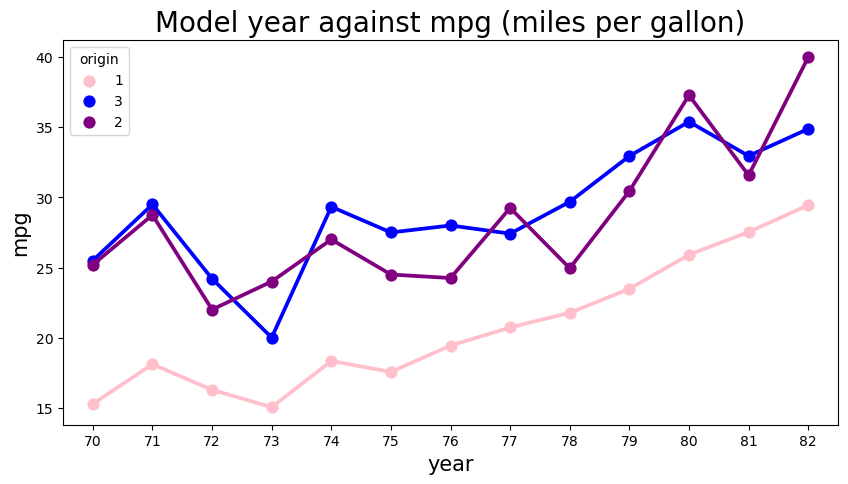

In [106]:
plt.figure(figsize=(10, 5))

custom_palette = {'1': 'pink', '2': 'purple', '3': 'blue'}

sns.pointplot(
    x='model year', 
    y='mpg', 
    hue='origin', 
    data=autompg, 
    errorbar=None, 
    palette=custom_palette  
)
plt.title("Model year against mpg (miles per gallon)", fontsize=20)
plt.xlabel("year", fontsize=15)
plt.ylabel("mpg", fontsize=15)
plt.show()


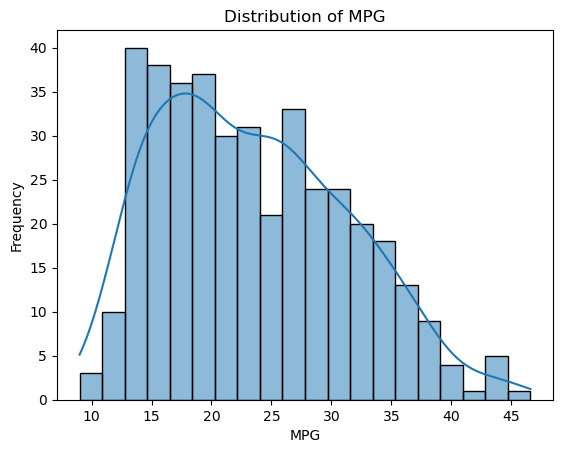

In [108]:
sns.histplot(autompg['mpg'], kde=True, bins=20)
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()


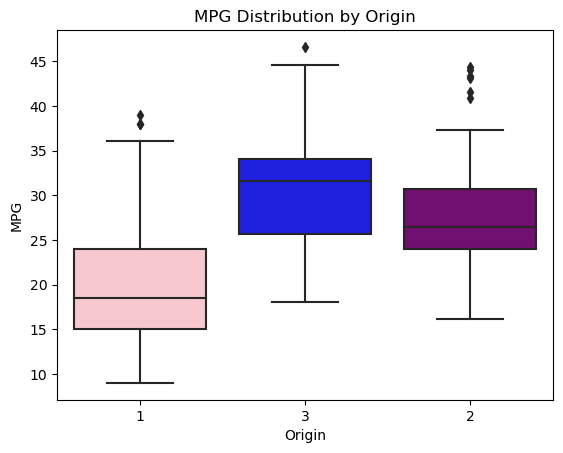

In [110]:

custom_palette = {'1': 'pink', '2': 'purple', '3': 'blue'}

sns.boxplot(x='origin', y='mpg', data=autompg, palette=custom_palette)
plt.title('MPG Distribution by Origin')
plt.xlabel('Origin')
plt.ylabel('MPG')
plt.show()


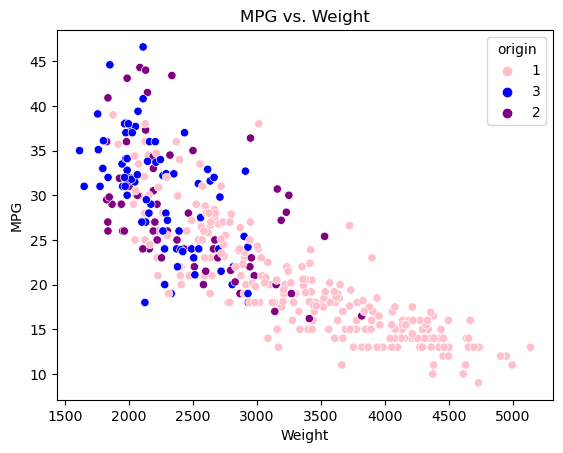

In [112]:

sns.scatterplot(x='weight', y='mpg', data=autompg, hue='origin', palette=custom_palette)
plt.title('MPG vs. Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()


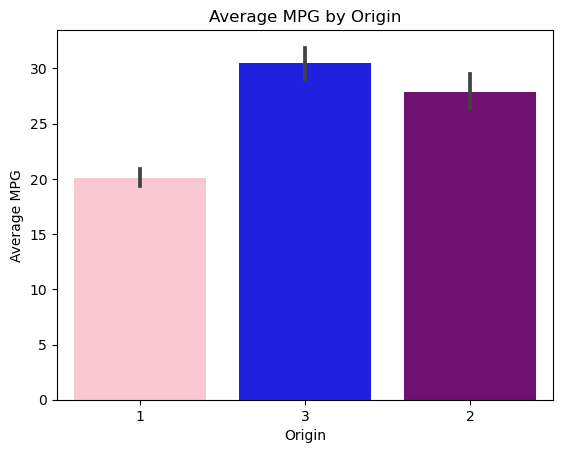

In [114]:
sns.barplot(x='origin', y='mpg', data=autompg, palette=custom_palette)
plt.title('Average MPG by Origin')
plt.xlabel('Origin')
plt.ylabel('Average MPG')
plt.show()

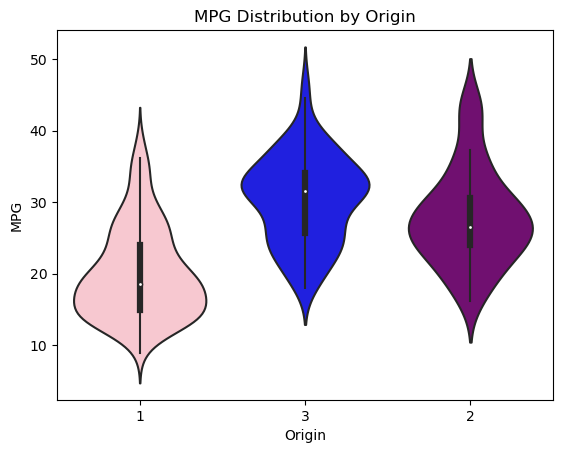

In [116]:

sns.violinplot(x='origin', y='mpg', data=autompg, palette=custom_palette)
plt.title('MPG Distribution by Origin')
plt.xlabel('Origin')
plt.ylabel('MPG')
plt.show()


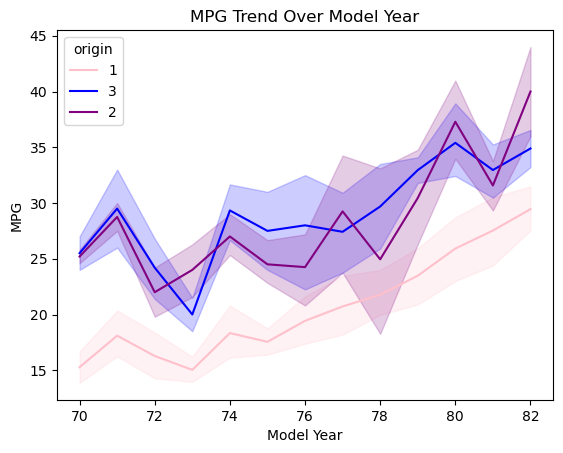

In [118]:

sns.lineplot(x='model year', y='mpg', data=autompg, hue='origin', palette=custom_palette)
plt.title('MPG Trend Over Model Year')
plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.show()


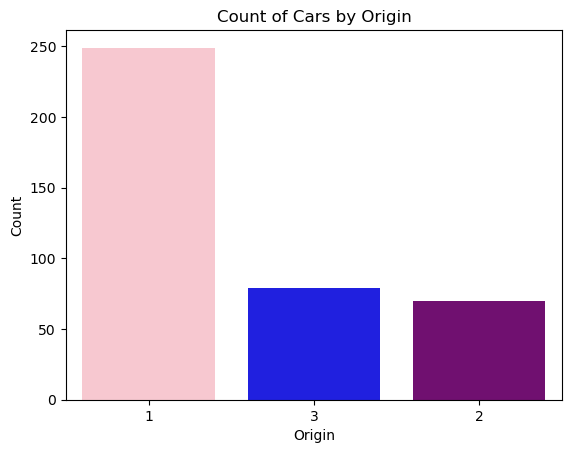

In [120]:

sns.countplot(x='origin', data=autompg, palette=custom_palette)
plt.title('Count of Cars by Origin')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.show()


/Users/raluca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


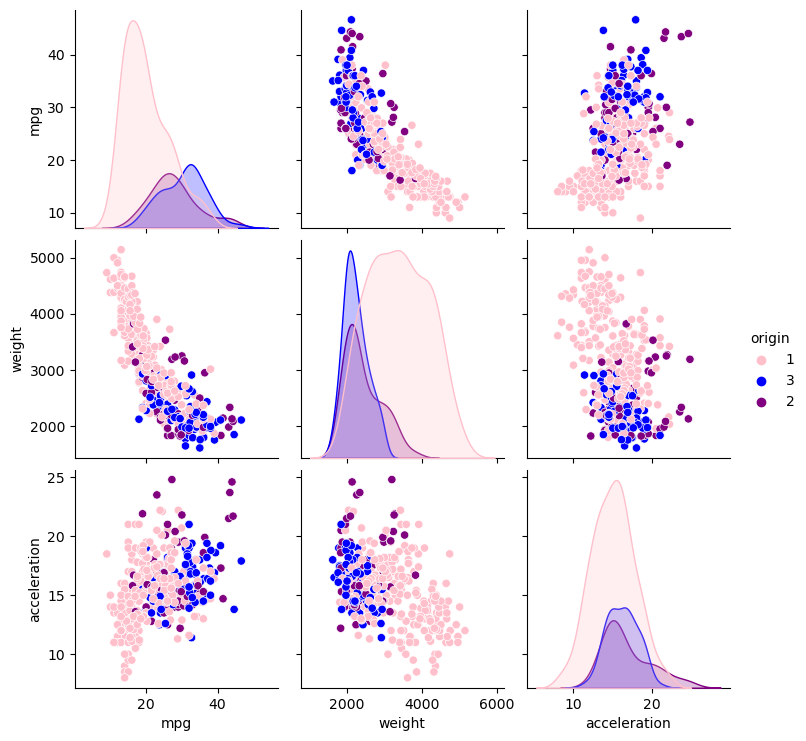

In [122]:

sns.pairplot(autompg[['mpg', 'horsepower', 'weight', 'acceleration', 'origin']], hue='origin', palette=custom_palette)
plt.show()


In [133]:
import pandas as pd

autompg = pd.DataFrame({
    'origin': ['America', 'Europe', 'Asia', 'America', 'Asia']
})

autompg['Region_Code'] = autompg['origin'].replace({
    'America': 1,
    'Europe': 2,
    'Asia': 3
})

print(autompg)


    origin  Region_Code
0  America            1
1   Europe            2
2     Asia            3
3  America            1
4     Asia            3
